In [76]:
import geopandas as gpd
import pickle

import matplotlib.pyplot as plt
import geoplot as gplt

import tempun

import nltk

In [25]:
GIST = gpd.read_parquet("../data/large_files/GIST_geocontexts.parquet")
GIST = GIST[GIST["random_dates"].notnull()]

In [37]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
Greece = gpd.read_file("../data/Greece_AL2.GeoJson", driver="GeoJSON") # borders of greek downloaded from https://www.kaggle.com/datasets/lsind18/greeceborders?resource=download

In [26]:
GIST["random_dates"] = GIST["random_dates"].apply(list)

In [17]:
freqs_tups = pickle.load(open("../data/freqs_tups.pickle", "rb"))

In [18]:
dict(freqs_tups)["Ζεύς"]

4009

In [72]:
dict(freqs_tups)["ξένιος"]

76

In [19]:
def check_word_presence(lemmata_data, word):
    try:
        return word in lemmata_data["data"]
    except:
        False

In [28]:
word = "Ζεύς"
GIST["zeus?"] = GIST["lemmata"].apply(lambda x: check_word_presence(x, word))
word = "θεός"
GIST["theos?"] = GIST["lemmata"].apply(lambda x: check_word_presence(x, word))

In [29]:
GIST["zeus?"].sum()

3239

In [30]:
GIST["theos?"].sum()

8511

(-800.0, 600.0)

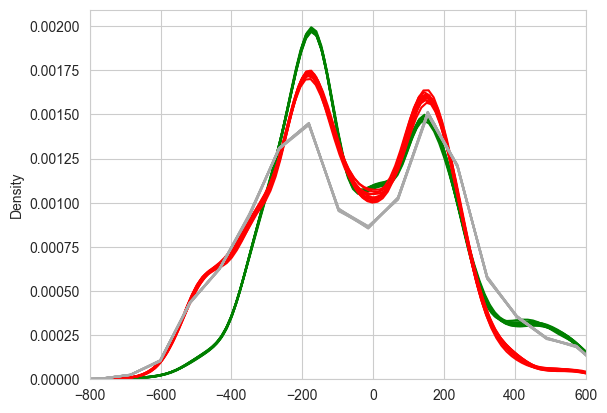

In [36]:
fig, ax = plt.subplots()
tempun.kdeplot_from_randoms(GIST[GIST["theos?"]]["random_dates"], random_size=10, color="green", ax=ax)
tempun.kdeplot_from_randoms(GIST[GIST["zeus?"]]["random_dates"], random_size=10, color="red", ax=ax)
tempun.kdeplot_from_randoms(GIST["random_dates"], random_size=10, color="darkgrey", ax=ax)
ax.set_xlim(-800, 600)

<AxesSubplot:>

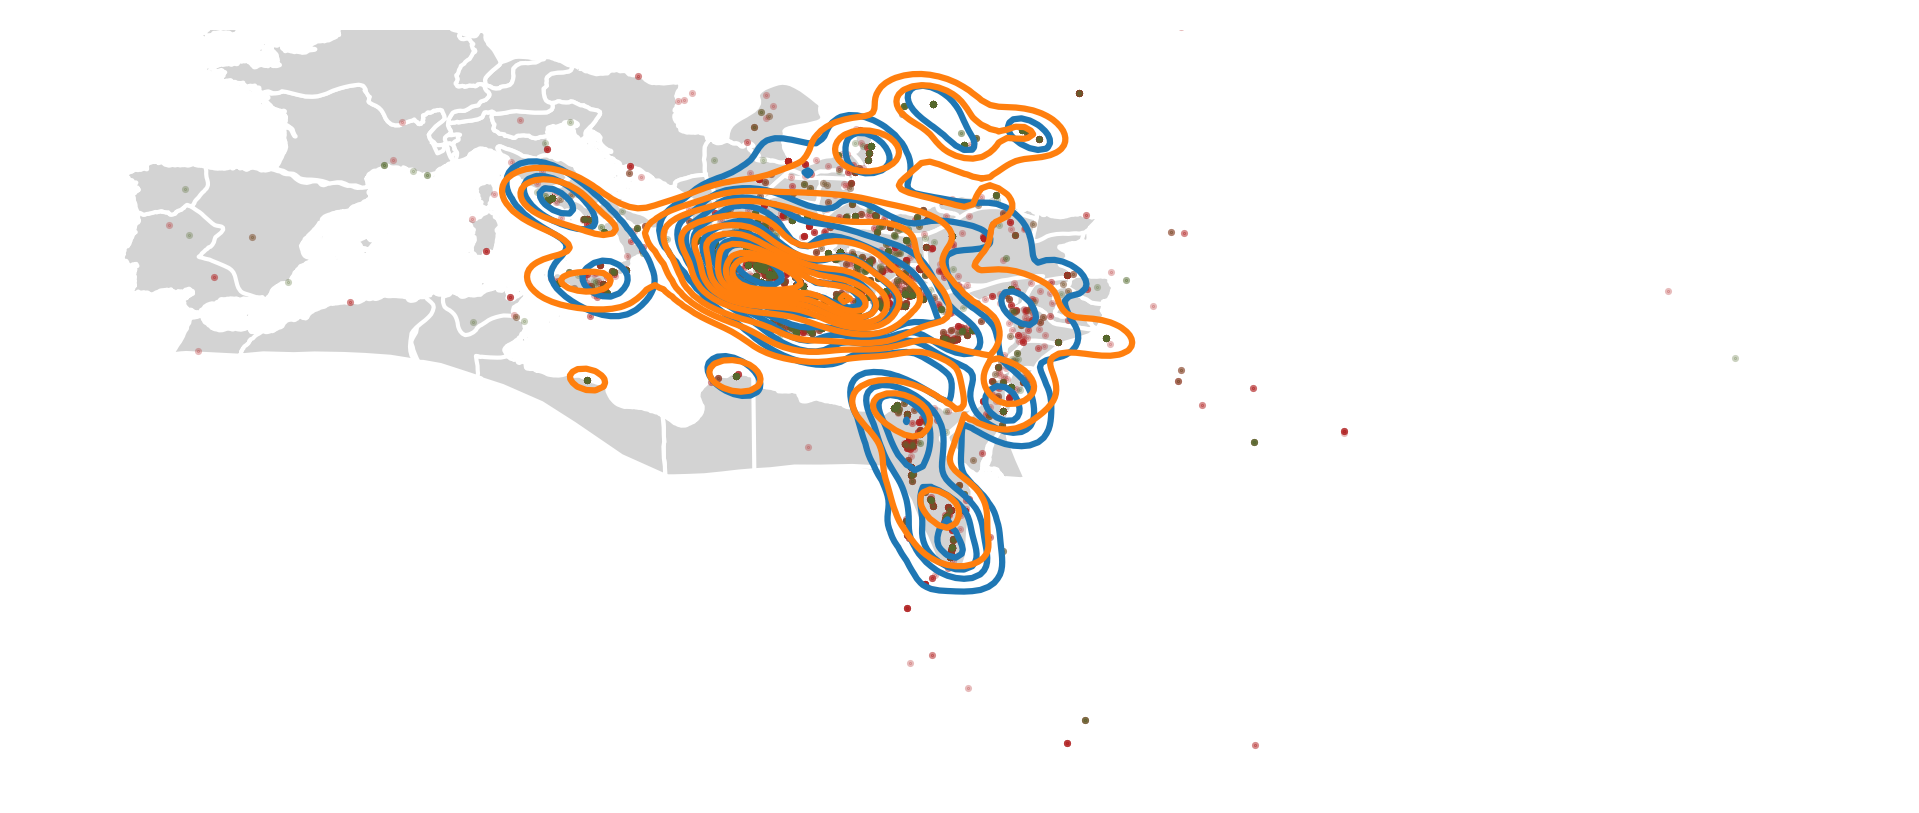

In [48]:
fig, ax = plt.subplots(figsize=(8,6), dpi=300)
ax.axis("off")
pleiades_regions.plot(ax=ax, color="lightgrey")

GIST[GIST["theos?"]].plot(markersize=0.5, ax=ax, color="firebrick", alpha=0.3)
gplt.kdeplot(GIST[GIST["theos?"]], ax=ax, fill=False)

GIST[GIST["zeus?"]].plot(markersize=0.5, ax=ax, color="darkolivegreen", alpha=0.3)
gplt.kdeplot(GIST[GIST["zeus?"]], ax=ax, fill=False)

# Theos and Zeus in context

In [96]:
def check_wordpair_presence(lemmata_data, word1, word2):
    try:
        return (word1 in lemmata_data["data"]) & (word2 in lemmata_data["data"])
    except:
        False

In [66]:
GIST["words_N"] = GIST["text_raw"].apply(lambda x: len(x.split()))

In [97]:
GIST["zeus+xenios"] = GIST["lemmata"].apply(lambda x: check_wordpair_presence(x, "Ζεύς", "ξένιος"))

In [98]:
GIST[GIST["zeus+xenios"]].iloc[2]["lemmata"]

{'data': array(['λόγος', 'ἱεροποιός', 'ἱεροποιησάντων', 'ἐνιαυτός', 'ἄρχων',
        'Πόλυβος', 'κραταιβίου', 'ἐρητυμένου', 'ἀκριδίωνος', 'δεῖνα',
        'ἀριστόβουλος', 'δεῖνα', 'Ἀντίγονος', 'δεῖνα', 'ὅδε',
        'παραλαμβάνω', 'ἀργύριον', 'ἱερός', 'κιβωτῶι', 'μείς',
        'γαλαξιῶνος', 'ἱεροποιός', 'Θεόδωρος', 'τιμοξένου', 'ναῶι',
        'Ἀπόλλων', 'πάρειμι', 'βουλή', 'ἄρχων', 'πόλις', 'γραμματεύς',
        'δεῖνα', 'δεῖνα', 'ἱεροποιός', 'δεῖνα', 'δεῖνα', 'πρύτανις',
        'μείς', 'στάμνος', 'ἐπιγραφή', 'ἔχω', 'ἀπαχθὲν', 'τῆνος', 'ἄλλος',
        'ἐπιγραφή', 'ἔχω', 'ἀπαχθὲν', 'τῆνος', 'ἄλλος', 'ἐπιγραφή', 'ἔχω',
        'ἀπαχθὲν', 'τῆνος', 'ἄλλος', 'ἐπιγραφή', 'ἔχω', 'ἀπαχθὲν', 'τῆνος',
        'ἄλλος', 'ἐπιγραφή', 'ἔχω', 'ἀπαχθὲν', 'τῆνος', 'ἄλλος',
        'ἐπιγραφή', 'ἔχω', 'ἀπαχθὲν', 'τῆνος', 'ἄλλος', 'ἐπιγραφή', 'ἔχω',
        'ἀπαχθὲν', 'τῆνος', 'ηηη', 'ἄλλος', 'ἐπιγραφή', 'ἔχω', 'μινώει',
        'φαίνω', 'λοιπός', 'χχχηηηη', 'ἄλλος', 'ἐπιγραφή', 'ἔχω',
        'ἀνενεχ

In [99]:
[ngram for ngram in nltk.ngrams(["w1", "w2", "w3"], 2)]

[('w1', 'w2'), ('w2', 'w3')]

In [100]:
lemmata = GIST[GIST["zeus+xenios"]].iloc[0]["lemmata"]["data"]

Larson: In Greek religion, this role of moral guarantor was expressed through Zeus’ cult titles: Zeus Hikesios protected the suppliant, Zeus Xenios the stranger, and Zeus Horkios the oath.
...

In [101]:
word1 = "Ζεύς"
word2 = "ξένιος"
[ngram for ngram in nltk.ngrams(lemmata, 2) if (word1 in ngram) & (word2 in ngram)]

[('Ζεύς', 'ξένιος')]

In [102]:
def check_ngrams(lemmata, word1, word2):
    return len([ngram for ngram in nltk.ngrams(lemmata, 2) if (word1 in ngram) & (word2 in ngram)]) > 0

In [103]:
def extract_word_ngrams(lemmata_data, word, ngram_len=2, position=0):
    lemmata = lemmata_data["data"]
    word_ngrams = [ngram for ngram in nltk.ngrams(lemmata, ngram_len) if ngram[position]  == word]
    return word_ngrams

In [104]:
GIST["zeus_bigrams"] = GIST["lemmata"].apply(lambda x: extract_word_ngrams(x, "Ζεύς", ngram_len=2, position=0))

In [105]:
GIST["zeus_bigrams"].apply(len).sum()

3817

In [108]:
nltk.FreqDist([ngram[1] for ngram_list in GIST["zeus_bigrams"] for ngram in ngram_list]).most_common()

[('σωτήρ', 252),
 ('πολίζω', 97),
 ('ἥμισυς', 94),
 ('Ὀλύμπιος', 82),
 ('ναός', 69),
 ('ἐλευθέριος', 67),
 ('ὀλυμπίωι', 67),
 ('ὅλος', 65),
 ('Ὀλυμπιεῖον', 64),
 ('ἀρτάμιτος', 55),
 ('σολυμεῖ', 55),
 ('πολιέως', 48),
 ('Ἀθήνη', 46),
 ('ὕψιστος', 40),
 ('ἥλιος', 39),
 ('μέγας', 38),
 ('δοκέω', 34),
 ('ὀλυμπίωι', 33),
 ('αἰών', 33),
 ('ἐπιμελητής', 22),
 ('Ἥλιος', 21),
 ('Ζεύς', 20),
 ('ἄλλος', 19),
 ('βοῦς', 19),
 ('νήιος', 17),
 ('βασιλεύς', 16),
 ('κυνθίου', 16),
 ('ἱκέσιος', 16),
 ('γῆ', 15),
 ('εὐβουλεῖ', 14),
 ('μεγάλο', 13),
 ('βροντῶντι', 13),
 ('μαστροὶ', 13),
 ('ὀλυνπίοι', 13),
 ('κυνθίωι', 12),
 ('ἔτος', 12),
 ('θεός', 12),
 ('κεραύνιος', 12),
 ('ναίωι', 12),
 ('ἕτερος', 11),
 ('κβ', 11),
 ('Ῥώμη', 11),
 ('πᾶς', 10),
 ('ὑψίστωι', 10),
 ('ταμιεύοντος', 10),
 ('ὕπατος', 9),
 ('ἀκραίου', 9),
 ('ἐγγυάω', 9),
 ('συμβαίνω', 9),
 ('ταλλαίω', 9),
 ('ὅπλον', 9),
 ('ἱερός', 9),
 ('ἀρετή', 9),
 ('Ἥρα', 9),
 ('ἀρτέμιτος', 9),
 ('ναίωι', 9),
 ('ὀράτριον', 9),
 ('ἐνιαυτός', 8),
 ('Σαβάζιος'

In [109]:
GIST["zeus_fivegrams_central"] = GIST["lemmata"].apply(lambda x: extract_word_ngrams(x, "Ζεύς", ngram_len=5, position=2))